In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [ ]:
def power_law(alpha,size):
    """
    Generate samples from a power-law distribution.

    Parameters:
    alpha (float): Exponent of the power-law distribution.
    x_min (float): Minimum value for the distribution.
    size (int): Number of samples to generate.

    Returns:
    numpy.ndarray: Samples from the power-law distribution.
    """
    # Generate samples from a uniform distribution
    u = np.random.uniform(size=size)
    # Compute the samples using the inverse transform method
    return ((1 - u)) ** (-1 / (alpha - 1))

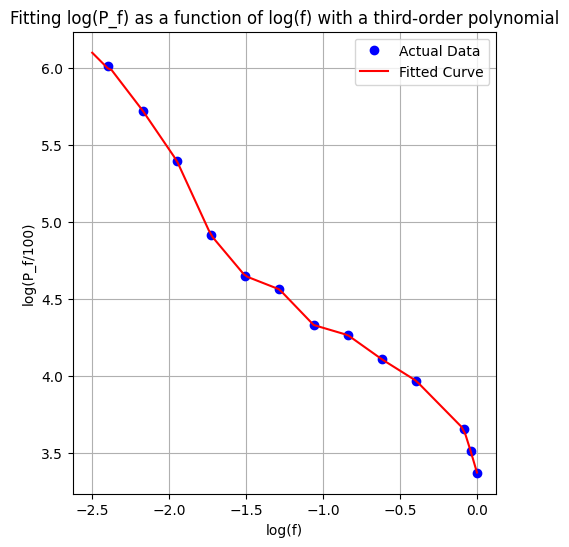

In [ ]:
import torch
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Define the function to fit
def model_func(log_f, c, d, e, f):
    return  c * log_f**3 + d * log_f**2 + e * log_f + f
# def model_func(log_f, f):
#     return  -log_f + f

# Actual data
P_f_layer3 = torch.tensor([   2350.53186663 ,   3240.67811257 ,   4511.11667767  ,  9289.41631719,
   12803.94362546 ,  18416.41855755,   21423.85915671  , 36487.9885906,
   44610.8832961  ,  82043.4377747 ,  250048.83502495,  529945.99539629,
 1034244.73895388])
f_list_layer3 = torch.tensor([1.   ,      0.91  ,     0.82 ,      0.40293126 ,0.24155094 ,0.14480599,
 0.08680891, 0.05204057, 0.0311975,  0.01870241 ,0.0112118  ,0.0067213,
 0.00402931])

# Take logarithms of data
log_P_f_layer3 = torch.log10(P_f_layer3)
log_f_list_layer3 = torch.log10(f_list_layer3)


def model_func(log_f):
    if np.log10(0.00402931)< log_f <=-0:
        interp_func = interp1d(log_f_list_layer3, log_P_f_layer3, kind='linear')
        return interp_func(log_f)
    else:
        return -(log_f + 2.4) +6




# Fit the model to the data
# popt, _ = curve_fit(model_func, log_f_list_layer3, log_P_f_layer3)
# popt=[-0.5534622782834162 ,-1.727630702643167, -1.783787291725454, 1.2898437238886448]
# Generate predicted values
log_f_values = np.linspace(-2.5, -0.0004, 100)
predicted_log_P_f=np.zeros(len(log_f_values))
for i,a in enumerate(log_f_values):
  predicted_log_P_f[i]= model_func(a)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_f_list_layer3, log_P_f_layer3, 'bo', label='Actual Data')
plt.plot(log_f_values, predicted_log_P_f, 'r-', label='Fitted Curve')
plt.xlabel('log(f)')
plt.ylabel('log(P_f/100)')
plt.title('Fitting log(P_f) as a function of log(f) with a third-order polynomial')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal', adjustable='box')
# plt.xlim(10**(-2.5),10**0)
plt.show()

C:\Users\alexk\AppData\Local\Temp\ipykernel_8796\2731095002.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


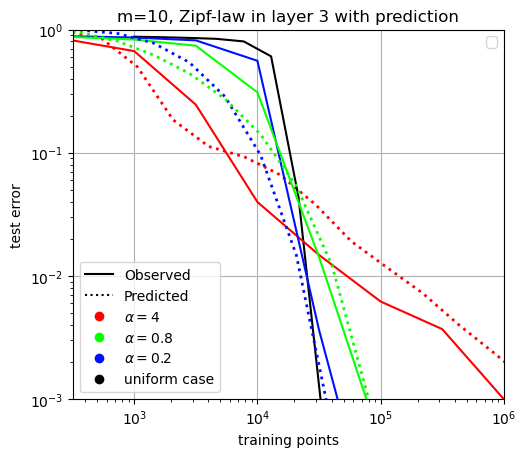

In [3]:
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")


def exp_prob(P,f_list):
  f_list=f_list
  exp=np.exp(-P*f_list/500)
  sum=f_list@exp
  return (1-1*sum)**4


layer3_overlapping_duplicate=np.array([[10.58, 12.22, 15.1, 17.88, 27.96, 67.95, 96.7, 98.99, 99.62, 99.86, 99.94, 99.96],
 [10.15, 10.26, 11.33, 11.6, 15.25, 22.94, 69.97, 97.35, 99.9, 100.0, 100.0, 100.0],
 [10.33, 9.88, 10.11, 11.73, 13.12, 16.34, 36.02, 99.75, 100.0, 100.0, 100.0, 100.0],
 [10.05, 10.41, 9.97, 10.3, 12.86, 14.74, 23.52, 99.79, 100.0, 100.0, 100.0, 100.0]])
for i in range(0):
  plt.loglog(np.logspace(1,6.5,12),1-0.01*layer3_overlapping_duplicate[i,:],color=colormap(i/3),linestyle="solid")


layer1_zipf=np.array([[11.0900, 11.1200, 13.5700, 16.8500, 45.2300, 87.2800, 96.6200, 98.5100, 99.4100, 99.6900],
[ 10.2000,  10.8300,  11.2900,  13.7700,  20.3600,  36.6400,  77.2000, 95.9200,  99.8300, 100.0000],
[  9.7500,  10.2900,  10.5400,  12.6200,  16.1400,  22.7700,  59.3900, 98.0100,  99.9500, 100.0000]])
# for i in range(3):
#   plt.loglog(np.logspace(1,5.5,10),1-0.01*layer1_zipf[i,:],color=colormap(i/3),linestyle="dashdot")






m=10
alpha=4
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=f_list

def path(P):
    mask = x > 1000/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
plt.loglog(ptr_list,error_list,color=colormap(0/3),linestyle='dotted',linewidth=2)



m=10
alpha=0.58
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=f_list
def path(P):
    mask = x >= 1000/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(1/4),linestyle='dotted',linewidth=2)




m=10
alpha=-0.5
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=f_list
def path(P):
    mask = x >= 1000/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(2/4),linestyle='dotted',linewidth=2)

uniform_result=np.array([12.56, 13.39, 14.5, 15.96, 19.94, 39.42, 95.62, 99.96, 100.0, 100.0])
plt.plot(np.logspace(3,5,10),1-0.01*uniform_result, color="black")
plt.gca().set_aspect('equal', adjustable='box')
# Create legends for colors
color_legend = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor="black", markersize=8)
]
color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
color_labels = [r'$\alpha=4$', r'$\alpha=0.8$',r'$\alpha=0.2$', r'uniform case']
linestyle_legend = [
    plt.Line2D([0], [0], linestyle="solid", color='black'),
    # plt.Line2D([0], [0], linestyle="dashdot", color='black'),
    plt.Line2D([0], [0], linestyle="dotted", color='black')
]
linestyle_labels = ['Observed', 'Predicted']
# Add legends
plt.legend(linestyle_legend, linestyle_labels, loc='lower right')
plt.legend(color_legend, color_labels, loc='lower right')
plt.gca().add_artist(plt.legend(linestyle_legend + color_legend, linestyle_labels + color_labels, loc='lower left'))



plt.xlabel("training points")
plt.ylabel("test error")
plt.grid()
plt.title("m=10, Zipf-law in layer 3 with prediction")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**2.5,10**6)
plt.ylim(10**(-3),1)

y=np.array([10.280, 12.750, 13.020, 18.430, 33.200, 75.450, 96.020, 98.520, 99.380, 99.630, 99.900,99.94])
plt.plot(np.logspace(1,6.5,12), 1-0.01*y,color=colormap(0/4))
y=np.array( [10.050, 10.380, 11.670, 12.980, 15.150, 21.880, 61.630, 99.200,99.99,100,100])
# plt.plot(np.logspace(1,6,11), 1-0.01*y)

layer3_02_08=torch.tensor([[[ 10.2050],
         [ 10.5050],
         [ 10.8000],
         [ 11.9050],
         [ 13.9250],
         [ 18.3400],
         [ 44.2500],
         [ 99.6350],
         [ 99.9950],
         [100.0000],
         [100.0000],
         [100.0000]],

        [[  9.9350],
         [ 11.3800],
         [ 11.9850],
         [ 12.9350],
         [ 17.0650],
         [ 26.0900],
         [ 69.1000],
         [ 98.5750],
         [ 99.9550],
         [ 99.9950],
         [100.0000],
         [100.0000]]]).squeeze(2)
plt.plot(np.logspace(1,6.5,12), 1-0.01*layer3_02_08[0], color=colormap(2/3))
plt.plot(np.logspace(1,6.5,12), 1-0.01*layer3_02_08[1], color=colormap(1/3))


m=10
alpha=0.2
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=f_list
def path(P):
    mask = x >= 1000/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
plt.loglog(ptr_list/2.8,error_list,color=colormap(2/3),linestyle='dotted',linewidth=2)



m=10
alpha=0.8
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=f_list
def path(P):
    mask = x >= 1000/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  # print(exp_prob(ptr_list[i],f_list))
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
plt.loglog(ptr_list/2.8,error_list,color=colormap(1/3),linestyle='dotted',linewidth=2)

f_list=np.ones(m)/m

error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  # print(exp_prob(ptr_list[i],f_list))
  error_list[i]=1-exp_prob(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color="black",linestyle='dotted',linewidth=2)





plt.legend()

In [ ]:
t_07_l123_f=power_law(1.2,size=(1000*10))
t_07_l123_f=t_07_l123_f.reshape(1000,10)
for i in range(t_07_l123_f.shape[0]):
  t_07_l123_f[i,:]=t_07_l123_f[i,:]/np.sum(t_07_l123_f[i,:])
t_07_l123_f=t_07_l123_f.reshape(-1)

t_02_l123_f=power_law(1.63,size=(1000*10))
t_02_l123_f=t_02_l123_f.reshape(1000,10)
for i in range(t_02_l123_f.shape[0]):
  t_02_l123_f[i,:]=t_02_l123_f[i,:]/np.sum(t_02_l123_f[i,:])
t_02_l123_f=t_02_l123_f.reshape(-1)

t_03_l123_f=power_law(3,size=(1000*10))
t_03_l123_f=t_03_l123_f.reshape(1000,10)
for i in range(t_03_l123_f.shape[0]):
  t_03_l123_f[i,:]=t_03_l123_f[i,:]/np.sum(t_03_l123_f[i,:])
t_03_l123_f=t_03_l123_f.reshape(-1)

t_08_l123_f=power_law(7.3,size=(1000*10))
t_08_l123_f=t_08_l123_f.reshape(1000,10)
for i in range(t_08_l123_f.shape[0]):
  t_08_l123_f[i,:]=t_08_l123_f[i,:]/np.sum(t_08_l123_f[i,:])
t_08_l123_f=t_08_l123_f.reshape(-1)

In [ ]:
bin_num=10000
n_07_l123_f,bins_07_l123_f,_=plt.hist(t_07_l123_f,bins=bin_num)
n_02_l123_f,bins_02_l123_f,_=plt.hist(t_02_l123_f,bins=bin_num)
n_03_l123_f,bins_03_l123_f,_=plt.hist(t_03_l123_f,bins=bin_num)
n_08_l123_f,bins_08_l123_f,_=plt.hist(t_08_l123_f,bins=bin_num)
plt.close()



for i in range(len(n_07_l123_f)):
  n_07_l123_f[i]*=(bins_07_l123_f[i]+bins_07_l123_f[i+1])/2
new_n_07_l123_f=np.zeros(len(n_07_l123_f))
for i in range(len(n_07_l123_f)):
  new_n_07_l123_f[i]=np.sum(n_07_l123_f[:i])
new_n_07_l123_f=new_n_07_l123_f/new_n_07_l123_f[len(n_07_l123_f)-1]
print(new_n_07_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_07_l123_f[:-1],new_n_07_l123_f,label=f"$\gamma=0.2$", color=colormap(0/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_07_l123_f[2], bins_07_l123_f[50]  # Endpoints in linear space
y1, y2 = new_n_07_l123_f[2], new_n_07_l123_f[50]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(0/4))
plt.text(0.4, 0.4, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(0/4))




for i in range(len(n_02_l123_f)):
  n_02_l123_f[i]*=(bins_02_l123_f[i]+bins_02_l123_f[i+1])/2
new_n_02_l123_f=np.zeros(len(n_02_l123_f))
for i in range(len(n_02_l123_f)):
  new_n_02_l123_f[i]=np.sum(n_02_l123_f[:i])
new_n_02_l123_f=new_n_02_l123_f/new_n_02_l123_f[len(n_02_l123_f)-1]
print(new_n_02_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_02_l123_f[:-1],new_n_02_l123_f,label=f"$\gamma=0.63$", color=colormap(1/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_02_l123_f[2], bins_02_l123_f[50]  # Endpoints in linear space
y1, y2 = new_n_02_l123_f[2], new_n_02_l123_f[50]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(1/4))
plt.text(0.4, 0.3, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(1/4))




for i in range(len(n_03_l123_f)):
  n_03_l123_f[i]*=(bins_03_l123_f[i]+bins_03_l123_f[i+1])/2
new_n_03_l123_f=np.zeros(len(n_03_l123_f))
for i in range(len(n_03_l123_f)):
  new_n_03_l123_f[i]=np.sum(n_03_l123_f[:i])
new_n_03_l123_f=new_n_03_l123_f/new_n_03_l123_f[len(n_03_l123_f)-1]
print(new_n_03_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_03_l123_f[:-1],new_n_03_l123_f,label=f"$\gamma=2$", color=colormap(2/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_03_l123_f[2], bins_03_l123_f[50]  # Endpoints in linear space
y1, y2 = new_n_03_l123_f[2], new_n_03_l123_f[50]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(2/4))
plt.text(0.4, 0.2, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(2/4))




for i in range(len(n_08_l123_f)):
  n_08_l123_f[i]*=(bins_08_l123_f[i]+bins_08_l123_f[i+1])/2
new_n_08_l123_f=np.zeros(len(n_08_l123_f))
for i in range(len(n_08_l123_f)):
  new_n_08_l123_f[i]=np.sum(n_08_l123_f[:i])
new_n_08_l123_f=new_n_08_l123_f/new_n_08_l123_f[len(n_08_l123_f)-1]
print(new_n_08_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_08_l123_f[:-1],new_n_08_l123_f,label=f"$\gamma=6.3$", color=colormap(3/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_08_l123_f[2], bins_08_l123_f[50]  # Endpoints in linear space
y1, y2 = new_n_08_l123_f[2], new_n_08_l123_f[50]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(3/4))
plt.text(0.4, 0.1, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(3/4))

plt.legend()
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ for different $\gamma$")
plt.xlabel(r"$f$")


new_n_07_l123_f=1-new_n_07_l123_f
new_n_02_l123_f=1-new_n_02_l123_f
new_n_03_l123_f=1-new_n_03_l123_f
new_n_08_l123_f=1-new_n_08_l123_f

Slope (Power Law Exponent): 0.8567779517189438
Slope (Power Law Exponent): 1.283465918681345
Slope (Power Law Exponent): 3.369990080217584


Text(0.5, 0, '$f$')

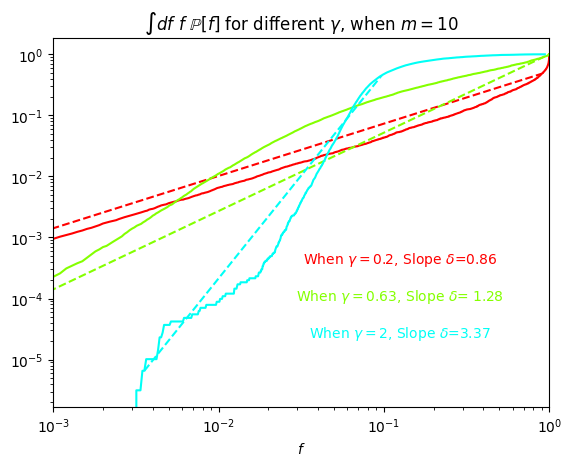

In [ ]:
plt.loglog(1,1)
plt.loglog(bins_07_l123_f[:-1],1-new_n_07_l123_f,label=f"$\gamma=0.2$", color=colormap(0/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_07_l123_f[2], bins_07_l123_f[9000]  # Endpoints in linear space
y1, y2 = 1-new_n_07_l123_f[2], 1-new_n_07_l123_f[9000]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(0/4))
plt.text(0.7, 0.4, f'When $\gamma=0.2$, Slope $\delta$={slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(0/4))

plt.loglog(bins_02_l123_f[:-1],1-new_n_02_l123_f,label=f"$\gamma=0.63$", color=colormap(1/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_02_l123_f[2], bins_02_l123_f[9999]  # Endpoints in linear space
y1, y2 = 1-new_n_02_l123_f[2], 1-new_n_02_l123_f[9999]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(1/4))
plt.text(0.7, 0.3, f'When $\gamma=0.63$, Slope $\delta$= {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(1/4))



plt.loglog(bins_03_l123_f[:-1],1-new_n_03_l123_f,label=f"$\gamma=2$", color=colormap(2/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_03_l123_f[5], bins_03_l123_f[1000]  # Endpoints in linear space
y1, y2 = 1-new_n_03_l123_f[5], 1-new_n_03_l123_f[1000]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(2/4))
plt.text(0.7, 0.2, f'When $\gamma=2$, Slope $\delta$={slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(2/4))



# plt.loglog(bins_08_l123_f[:-1],1-new_n_08_l123_f,label=f"$\gamma=6.3$", color=colormap(3/4))
# # plt.gca().set_aspect('equal', adjustable='box')
# plt.xlim(10**(-3),1)

# x1, x2 = bins_08_l123_f[500], bins_08_l123_f[2000]  # Endpoints in linear space
# y1, y2 = 1-new_n_08_l123_f[500], 1-new_n_08_l123_f[2000]  # Corresponding values
# slope = np.log(y2 / y1) / np.log(x2 / x1)
# print("Slope (Power Law Exponent):", slope)

# # Plot the line with the calculated slope
# plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(3/4))
# plt.text(0.7, 0.1, f'Slope $\delta$: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(3/4))

plt.title(r"$\int df \ f\ \mathbb{P}[f]$ for different $\gamma$, when $m=10$")
plt.xlabel(r"$f$")

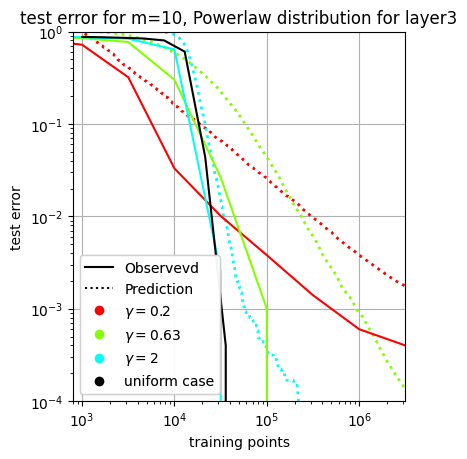

In [ ]:
exponent=1
exponent_in=4
plt.loglog(1000/bins_07_l123_f[:-1], (1-new_n_07_l123_f**exponent_in-0*new_n_07_l123_f**3*(1-new_n_07_l123_f))**exponent, label="predicted $\gamma=10^{-0.7}$",color=colormap(0/4),linestyle="dotted",linewidth=2)
plt.loglog(1000/bins_02_l123_f[:-1], (1-new_n_02_l123_f**exponent_in-0*new_n_02_l123_f**3*(1-new_n_02_l123_f))**exponent, label="predicted $\gamma=10^{-0.2}$",color=colormap(1/4),linestyle="dotted",linewidth=2)
plt.loglog(1000/bins_03_l123_f[:-1], (1-new_n_03_l123_f**exponent_in-0*new_n_03_l123_f**3*(1-new_n_03_l123_f))**exponent, label="predicted $\gamma=10^{0.3}$",color=colormap(2/4),linestyle="dotted",linewidth=2)
# plt.loglog(1000/bins_08_l123_f[:-1], (1-new_n_08_l123_f**exponent_in-0*new_n_08_l123_f**3*(1-new_n_08_l123_f))**exponent, label="predicted $\gamma=10^{0.8}$",color=colormap(3/4),linestyle="dotted",linewidth=2)
epsilon_list=np.logspace(-0.7,0.8,4)
for i in range(3):
  plt.loglog(np.logspace(1,6.5,12),1-0.01*layer3_overlapping_duplicate[i,:],color=colormap(i/4),linestyle="solid", label=f"predicted $\gamma={epsilon_list[i]:.1f}$")
plt.legend()
plt.xlabel("training points")
plt.ylabel("test error")
plt.grid()
plt.title("test error for m=10, Powerlaw distribution for layer3")
plt.xlim(10**2.9,10**6.5)
plt.ylim(10**(-4),10**0)
plt.gca().set_aspect('equal', adjustable='box')

uniform_result=np.array([12.56, 13.39, 14.5, 15.96, 19.94, 39.42, 95.62, 99.96, 100.0, 100.0])
plt.plot(np.logspace(3,5,10),1-0.01*uniform_result, color="black")

linestyle_legend = [
    plt.Line2D([0], [0], linestyle="solid", color='black'),
    plt.Line2D([0], [0], linestyle="dotted", color='black')
]
linestyle_labels = ['Observevd', 'Prediction']

# Create legends for colors
color_legend = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor="black", markersize=8)
]
color_labels = ['$\gamma=0.2$', '$\gamma=0.63$', '$\gamma=2$', 'uniform case']

# Add legends
plt.legend(linestyle_legend, linestyle_labels, loc='lower right')
plt.legend(color_legend, color_labels, loc='lower right')
plt.gca().add_artist(plt.legend(linestyle_legend + color_legend, linestyle_labels + color_labels, loc='lower left'))
plt.gca().set_aspect('equal', adjustable='box')

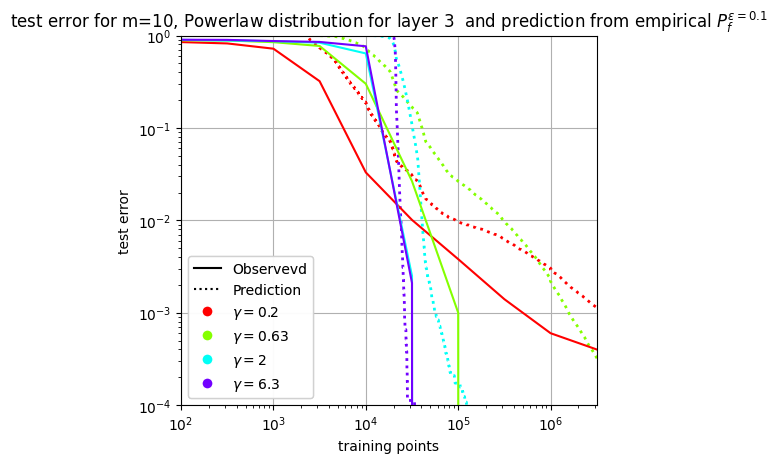

In [ ]:
exponent=1
exponent_in=4
log_bins_07_l123_f=np.log10(bins_07_l123_f)
log_bins_02_l123_f=np.log10(bins_02_l123_f)
log_bins_03_l123_f=np.log10(bins_03_l123_f)
log_bins_08_l123_f=np.log10(bins_08_l123_f)

P_f_fitted=np.zeros(len(log_bins_07_l123_f)-1)
for a,i in enumerate(log_bins_07_l123_f[:-1]):
  P_f_fitted[a]=model_func(i)
plt.loglog(np.power(10,P_f_fitted), (1-new_n_07_l123_f**exponent_in-3*new_n_07_l123_f**3*(1-new_n_07_l123_f))**exponent, label="theory $\gamma=0.2$ ",color=colormap(0/4),linestyle="dotted",linewidth=2)
P_f_fitted=np.zeros(len(log_bins_07_l123_f)-1)
for a,i in enumerate(log_bins_02_l123_f[:-1]):
  P_f_fitted[a]=model_func(i)
plt.loglog(np.power(10,P_f_fitted), (1-new_n_02_l123_f**exponent_in-3*new_n_02_l123_f**3*(1-new_n_02_l123_f))**exponent,  label="theory $\gamma=0.63$",color=colormap(1/4),linestyle="dotted",linewidth=2)
P_f_fitted=np.zeros(len(log_bins_07_l123_f)-1)
for a,i in enumerate(log_bins_03_l123_f[:-1]):
  P_f_fitted[a]=model_func(i)
plt.loglog(np.power(10,P_f_fitted), (1-new_n_03_l123_f**exponent_in-3*new_n_03_l123_f**3*(1-new_n_03_l123_f))**exponent,  label="theory $\gamma=2$",color=colormap(2/4),linestyle="dotted",linewidth=2)
P_f_fitted=np.zeros(len(log_bins_07_l123_f)-1)
for a,i in enumerate(log_bins_08_l123_f[:-1]):
  P_f_fitted[a]=model_func(i)
plt.loglog(np.power(10,P_f_fitted), (1-new_n_08_l123_f**exponent_in-3*new_n_08_l123_f**3*(1-new_n_08_l123_f))**exponent,  label="theory $\gamma=6.3$",color=colormap(3/4),linestyle="dotted",linewidth=2)

for i in range(4):
  plt.loglog(np.logspace(1,6.5,12),1-0.01*layer3_overlapping_duplicate[i,:],color=colormap(i/4),linestyle="solid")
plt.legend()
plt.xlabel("training points")
plt.ylabel("test error")
plt.grid()
plt.title("test error for m=10, Powerlaw distribution for layer 3  and prediction from empirical $P^{\epsilon=0.1}_f $")
plt.xlim(10**2,10**6.5)
plt.ylim(10**(-4),10**0)
plt.gca().set_aspect('equal', adjustable='box')


linestyle_legend = [
    plt.Line2D([0], [0], linestyle="solid", color='black'),
    plt.Line2D([0], [0], linestyle="dotted", color='black')
]
linestyle_labels = ['Observevd', 'Prediction']

# Create legends for colors
color_legend = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/4), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(3/4), markersize=8)
]
color_labels = ['$\gamma=0.2$', '$\gamma=0.63$', '$\gamma=2$', '$\gamma=6.3$']

# Add legends
plt.legend(linestyle_legend, linestyle_labels, loc='lower right')
plt.legend(color_legend, color_labels, loc='lower right')
plt.gca().add_artist(plt.legend(linestyle_legend + color_legend, linestyle_labels + color_labels, loc='lower left'))
plt.gca().set_aspect('equal', adjustable='box')